In [1]:
from vmod.source import Penny
from vmod.inverse import Inverse
from vmod import util
import numpy as np
import corner
import matplotlib.pyplot as plt

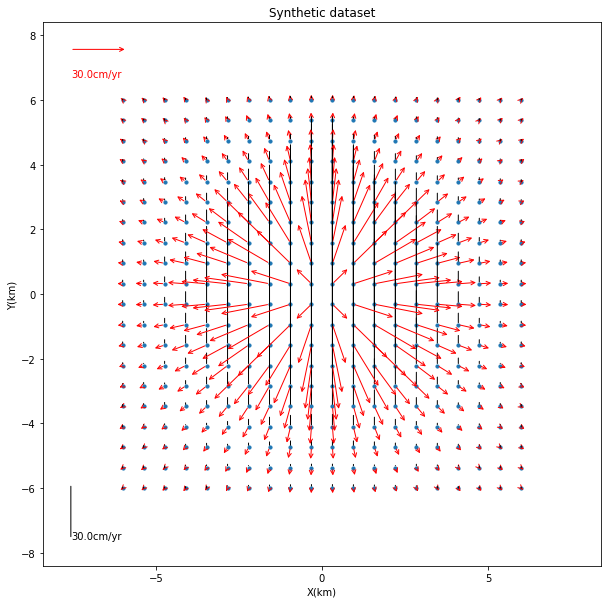

In [2]:
from vmod.data import Gnss

x1=np.linspace(-6000,6000,20)
y1=np.linspace(-6000,6000,20)
X,Y=np.meshgrid(x1,y1)

xgps=X.ravel()
ygps=Y.ravel()

datf = Gnss()
datf.add_xs(xgps)
datf.add_ys(ygps)

#print(dat.ys)

#Penny shaped crack model
penny = Penny(datf)
#Initial parameters [xcen,ycen,depth,pressure(shear),radius]
penny.set_x0(np.array([0, 0, 500, 0.001, 1000]))
#Bounds for parameters [xcen,ycen,depth,pressure(shear),radius]
penny.set_bounds(low_bounds = [-10000, -10000, 0, 0, 0], high_bounds = [10000, 10000, 40000, 0.01, 10000])

inv=Inverse(datf)
inv.register_source(penny)

params=[0, 0, 3000, 0.01, 1000]

datf.add_data(xgps*0,xgps*0,xgps*0)

ux,uy,uz=inv.forward(params,unravel=False)

uxd=ux+np.random.normal(0,np.abs(ux)/4)
uyd=uy+np.random.normal(0,np.abs(uy)/4)
uzd=uz+np.random.normal(0,np.abs(uz)/4)

dat = Gnss()
dat.add_xs(xgps)
dat.add_ys(ygps)

#dat.add_data(uxd,uyd,uzd)
dat.add_data(ux,uy,uz)

util.plot_gnss(xgps,ygps,dat.ux,dat.uy,dat.uz,title='Synthetic dataset',scl=30.0,figsize=(10,10))

In [3]:
from vmod.source import Regsill

reg = Regsill(dat,typ='open',ln=7,wn=7,depth=3e3,length=4e3,width=4e3,lamb=1e-3)
reg.set_x0(0.0)
#Initial parameters [xcen,ycen,depth,length,width,opening,strike,dip]
reg.set_bounds(low_bound = -20, high_bound = 20)

In [4]:
inv=Inverse(dat)
inv.register_source(reg)

In [5]:
ans=inv.nlsq()

0.026555758555503187


In [6]:
print(ans.x)

[ 0.14101707  0.16810753  0.59323267  0.44195102  0.13764022  0.09487628
  0.66154669  0.57108742  0.14856835  0.02126741  0.44472165  0.53016181
  0.32484675  0.22259709  0.42138468  0.56285383  0.54989199  0.51784689
  0.56597003  0.62843519  0.17569956  0.29474758  0.55779463  0.36661996
  0.06226871  0.08925911  0.36436103  0.2566985  -0.06903158 -0.19165188
 -0.10537373 -0.00914752  0.07240093 -0.0035335  -0.07044593  0.03157223
  0.29633926  0.37208671  0.32027302  0.26514193  0.21621648  0.40703751
  0.23317421  0.13515226 -0.01153671  0.07970903 -0.26971556 -0.28086841
 -0.32860327 -0.43674605 -0.87217234 -0.76832701 -0.29709345 -0.36152692
 -0.71392553 -0.70737928 -0.13582283  0.01326453 -0.11954416 -0.30082867
  0.34004516  0.49973668  0.25803023  0.27527368  0.08466371  0.14414228
 -0.19053486 -0.09378674 -0.31861358 -0.45503765 -0.68875237 -0.5627279
 -0.25251888 -0.37004091 -0.43583629 -0.44165384  0.05716546  0.13638668
  0.1402241  -0.00890124  0.47095354  0.52895088  0.

xs [1714.2857142857142, -1714.2857142857142, -1714.2857142857142, 1714.2857142857142, 1714.2857142857142, -1714.2857142857142, -1714.2857142857142, 1714.2857142857142, 1714.2857142857142, -1714.2857142857142, -1714.2857142857142, 1714.2857142857142, 1142.8571428571427, -1142.8571428571427, -1142.8571428571427, 1142.8571428571427, 1142.8571428571427, -1142.8571428571427, -1142.8571428571427, 1142.8571428571427, 1142.8571428571427, -1142.8571428571427, -1142.8571428571427, 1142.8571428571427, 571.4285714285713, -571.4285714285713, -571.4285714285713, 571.4285714285713, 571.4285714285713, -571.4285714285713, -571.4285714285713, 571.4285714285713, 571.4285714285713, -571.4285714285713, -571.4285714285713, 571.4285714285713, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1714.2857142857142, -1714.2857142857142, 1142.8571428571427, -1142.8571428571427, 571.4285714285713, -571.4285714285713, 0]
ys [1714.2857142857142, 1714.2857142857142, -1714.2857142857142, -1714.2857142857142, 1142.8571428571427, 1142.85714

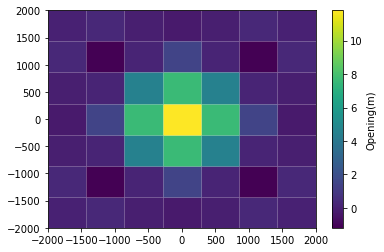

In [6]:
reg.plot_patches(ans.x)

In [5]:
inv.mcmc('regsill')

 [                  0%                  ] 111 of 1100000 complete in 6.0 secHalting at iteration  116  of  1100000


(array([], shape=(4, 0), dtype=float64), <pymc.MCMC.MCMC at 0x7f62d3062970>)